#Day3_Example1

#**Automobile Data Set**#
This data set from the UCI Machine Learning Repository is from 1985 Model Import Car and Truck Specifications, 1985 Ward's Automotive Yearbook, Personal Auto Manuals, Insurance Services Office, 160 Water Street, New York, NY 10038, ad Insurance Collision Report, Insurance Institute for Highway Safety, Watergate 600, Washington, DC 20037.

This data set consists of three types of entities: 

*   the specification of an auto in terms of various characteristics
*   its assigned insurance risk rating
*   its normalized losses in use as compared to other cars 

The second rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuaries call this process "symboling". A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.

The third factor is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two-door small, station wagons, sports/speciality, etc...), and represents the average loss per car per year.

Several of the attributes in the database could be used as a "class" attribute. We will be using the city-mpg as the designated attribute for a response variable.

Our primary task is to apply feature selection and dimensionality reduction to identify the explanatory variable city-mpg to be included within a linear
regression model that predicts automobile gas mileage.


###**Preliminary Facts**###

As per the UCI website, these are our givens:
1. symboling: -3, -2, -1, 0, 1, 2, 3.
2. normalized-losses: continuous from 65 to 256.
3. make:
alfa-romero, audi, bmw, chevrolet, dodge, honda,
isuzu, jaguar, mazda, mercedes-benz, mercury,
mitsubishi, nissan, peugot, plymouth, porsche,
renault, saab, subaru, toyota, volkswagen, volvo

4. fuel-type: diesel, gas.
5. aspiration: std, turbo.
6. num-of-doors: four, two.
7. body-style: hardtop, wagon, sedan, hatchback, convertible.
8. drive-wheels: 4wd, fwd, rwd.
9. engine-location: front, rear.
10. wheel-base: continuous from 86.6 120.9.
11. length: continuous from 141.1 to 208.1.
12. width: continuous from 60.3 to 72.3.
13. height: continuous from 47.8 to 59.8.
14. curb-weight: continuous from 1488 to 4066.
15. engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
16. num-of-cylinders: eight, five, four, six, three, twelve, two.
17. engine-size: continuous from 61 to 326.
18. fuel-system: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
19. bore: continuous from 2.54 to 3.94.
20. stroke: continuous from 2.07 to 4.17.
21. compression-ratio: continuous from 7 to 23.
22. horsepower: continuous from 48 to 288.
23. peak-rpm: continuous from 4150 to 6600.
24. city-mpg: continuous from 13 to 49.
25. highway-mpg: continuous from 16 to 54.
26. price: continuous from 5118 to 45400.





In [2]:
# load all libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report,roc_auc_score
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder 
from sklearn.compose import ColumnTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import (model_selection,preprocessing)
from sklearn.dummy import DummyRegressor

# load the entire dataset from a file uploaded to my GitHub repo
df = pd.read_csv("https://raw.githubusercontent.com/MatthewFried/Udemy/master/Day3/Day3%20Data.csv", names=['Symboling', 'Normalized_Losses', 'Make', 'Fuel_Type','Aspiration','Num_Doors','Body_Style', 'Drive_Wheels','Engine_Location','Wheel_Base', 'Length','Width','Height','Curb_Weight','Engine_Type','Num_Cylinders','Engine_Size','Fuel_System','Bore','Stroke','Compression_Ratio', 'Horsepower','Peak_RPM','City_MPG','Highway_MPG','Price'])

#create a second stored value of original data as a safety
df_orignal = df

# check the dataset uploaded as expected
print("Observations: {}".format(df.shape[0]))
pd.set_option('display.max_columns', 20)
df.head()

Observations: 205


,Symboling,Normalized_Losses,Make,Fuel_Type,Aspiration,Num_Doors,Body_Style,Drive_Wheels,Engine_Location,Wheel_Base,...,Engine_Size,Fuel_System,Bore,Stroke,Compression_Ratio,Horsepower,Peak_RPM,City_MPG,Highway_MPG,Price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [ ]:
#check if we have any null
#we note nothing is null because, as we can see from the data, it is encoded with a '?'
df.isnull().sum()

Symboling            0
Normalized_Losses    0
Make                 0
Fuel_Type            0
Aspiration           0
Num_Doors            0
Body_Style           0
Drive_Wheels         0
Engine_Location      0
Wheel_Base           0
Length               0
Width                0
Height               0
Curb_Weight          0
Engine_Type          0
Num_Cylinders        0
Engine_Size          0
Fuel_System          0
Bore                 0
Stroke               0
Compression_Ratio    0
Horsepower           0
Peak_RPM             0
City_MPG             0
Highway_MPG          0
Price                0
dtype: int64

In [ ]:
#Before beginning our encoding and imputation we will get a count of the distinct categorical values, even though it is listed above
df.nunique()

Symboling              6
Normalized_Losses     52
Make                  22
Fuel_Type              2
Aspiration             2
Num_Doors              3
Body_Style             5
Drive_Wheels           3
Engine_Location        2
Wheel_Base            53
Length                75
Width                 44
Height                49
Curb_Weight          171
Engine_Type            7
Num_Cylinders          7
Engine_Size           44
Fuel_System            8
Bore                  39
Stroke                37
Compression_Ratio     32
Horsepower            60
Peak_RPM              24
City_MPG              29
Highway_MPG           30
Price                187
dtype: int64

##**Label and Hot Encoding**##

Since our data has several categorical variables and we will be analyzing this using certain dimensional reduction techniques that require numerical data, we will do a one hot encoding for any variable with two options and we will do label encoding for any variable with greater than two options. The reason for this is that we already have many features, and although label encoding is weaker than hot encoding, we need to work with these important parameters.

In [ ]:
#Label Encode our class variable: 
df_LE = df
le = LabelEncoder() 
df_LE['Make'] = le.fit_transform(df_LE['Make'])
df_LE['Body_Style'] = le.fit_transform(df_LE['Body_Style'])
df_LE['Drive_Wheels'] = le.fit_transform(df_LE['Drive_Wheels'])
df_LE['Engine_Type'] = le.fit_transform(df_LE['Engine_Type'])
df_LE['Num_Cylinders'] = le.fit_transform(df_LE['Num_Cylinders'])
df_LE['Fuel_System'] = le.fit_transform(df_LE['Fuel_System'])

#Do one hot code for relevant features, as expressed above
features_to_encode = ['Fuel_Type', 'Aspiration', 'Num_Doors', 'Engine_Location']
for m in features_to_encode:
    dummies = pd.get_dummies(df_LE[m])
    df_LE = pd.concat([df_LE, dummies], axis=1)

#drop the original data that was just hot coded
df_LE = df_LE.drop(features_to_encode, axis=1)

#We drop the ? column as it only has one point and is a categorical data and regular imputing techniques, such as the median, will not work for this type of data
df_LE = df_LE.drop(['?'],axis = 1)

df_LE.head()

,Symboling,Normalized_Losses,Make,Body_Style,Drive_Wheels,Wheel_Base,Length,Width,Height,Curb_Weight,...,Highway_MPG,Price,diesel,gas,std,turbo,four,two,front,rear
0,3,?,0,0,2,88.6,168.8,64.1,48.8,2548,...,27,13495,0,1,1,0,0,1,1,0
1,3,?,0,0,2,88.6,168.8,64.1,48.8,2548,...,27,16500,0,1,1,0,0,1,1,0
2,1,?,0,2,2,94.5,171.2,65.5,52.4,2823,...,26,16500,0,1,1,0,0,1,1,0
3,2,164,1,3,1,99.8,176.6,66.2,54.3,2337,...,30,13950,0,1,1,0,1,0,1,0
4,2,164,1,3,0,99.4,176.6,66.4,54.3,2824,...,22,17450,0,1,1,0,1,0,1,0


##**Initial EDA**##

Here we will use our data to test for the following:
*   Finding Any Missing Value
*   Finding Outliers
*   Understanding attributes using descriptive statistics
*   Visualizing attribute distribution using univariate and multivariate analysis
*   Finding attribute correlation and analysing which attribute is more important



In [ ]:
df_LE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Symboling          205 non-null    int64  
 1   Normalized_Losses  205 non-null    object 
 2   Make               205 non-null    int64  
 3   Body_Style         205 non-null    int64  
 4   Drive_Wheels       205 non-null    int64  
 5   Wheel_Base         205 non-null    float64
 6   Length             205 non-null    float64
 7   Width              205 non-null    float64
 8   Height             205 non-null    float64
 9   Curb_Weight        205 non-null    int64  
 10  Engine_Type        205 non-null    int64  
 11  Num_Cylinders      205 non-null    int64  
 12  Engine_Size        205 non-null    int64  
 13  Fuel_System        205 non-null    int64  
 14  Bore               205 non-null    object 
 15  Stroke             205 non-null    object 
 16  Compression_Ratio  205 non

##**Imputation**##
We have several spots in the data that say '?'. Since we cannot use PCA and other techniques on data that is missing. Our approach is to convert the '?' to a NaN and then use imputation. Rather than rest on our laurels and accept this wihtout recourse, we keep track of each new variation and will test these within our EDA moving forward.
To accomplish this we use Simple Imputation with the mean, and we also use an Iterative Imputer with 4 different algorithms to see which best gives a summary of the data. Since the Normalized_Losses column contains the greatest number of question marks, as one can see when viewing it with the naked eye, no code required, we plot that data point specifically.
Since each continued choice here represents layers of possible distortion, we keep track of each approach and thereby ensure that our EDA is sufficient in it's scope.
Since several of the alogrithms used in the Iterative Imputer are quite sophisticated, and since our direct action is not this, we refer the reader to *Python Feature Engineering Cookbook* by Galli for further exploration into the depths of said models.

In [ ]:
#Change ? to null for imputation procedure
df_LE = df_LE.replace('?',np.NaN)

#Check info
df_LE.isnull().sum()

Symboling             0
Normalized_Losses    41
Make                  0
Body_Style            0
Drive_Wheels          0
Wheel_Base            0
Length                0
Width                 0
Height                0
Curb_Weight           0
Engine_Type           0
Num_Cylinders         0
Engine_Size           0
Fuel_System           0
Bore                  4
Stroke                4
Compression_Ratio     0
Horsepower            2
Peak_RPM              2
City_MPG              0
Highway_MPG           0
Price                 4
diesel                0
gas                   0
std                   0
turbo                 0
four                  0
two                   0
front                 0
rear                  0
dtype: int64

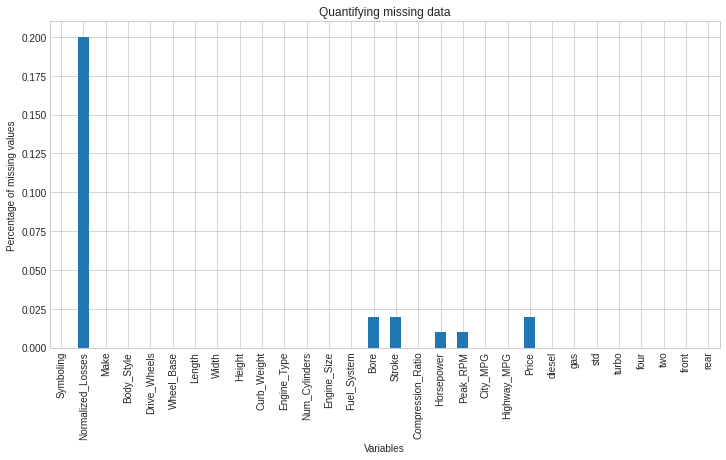

In [ ]:
#Prepare column names if needed
variables = df_LE.columns.values

#Create chart detailing info
df_LE.isnull().mean().plot.bar(figsize=(12,6))
plt.ylabel('Percentage of missing values')
plt.xlabel('Variables')
plt.title('Quantifying missing data')

#Make a copy to hold values in case we choose to have more typese of imputation
df_SI = df_LE.copy() #SI is simple imputer
df_II = df_LE.copy() #II is iterative imputer


#**Actual Imputation**#
Above we checked our data for the amount of NaNs. As such we are fully ready to impute. We will use the simple imputer first, and then go to several models dealing with iterative imputing. Since running so many models against every change will be cumbersome for readers to follow, we will endeavor to alleviate this burden by noting that the below charts put the Bayes model as a fairly central model, being around the median imputation, as per this write up, after said piece de resistance is created below.

In [ ]:
X = df_SI.iloc[:,0:29] 
imputer = SimpleImputer(missing_values=np.nan, strategy='median', verbose=1)

#fill missing values with median column values
transformed_values = imputer.fit_transform(X)
column = X.columns
print(column)
df_SI = pd.DataFrame(transformed_values, columns = column )
df_SI.describe()

Index(['Symboling', 'Normalized_Losses', 'Make', 'Body_Style', 'Drive_Wheels',
       'Wheel_Base', 'Length', 'Width', 'Height', 'Curb_Weight', 'Engine_Type',
       'Num_Cylinders', 'Engine_Size', 'Fuel_System', 'Bore', 'Stroke',
       'Compression_Ratio', 'Horsepower', 'Peak_RPM', 'City_MPG',
       'Highway_MPG', 'Price', 'diesel', 'gas', 'std', 'turbo', 'four', 'two',
       'front'],
      dtype='object')


,Symboling,Normalized_Losses,Make,Body_Style,Drive_Wheels,Wheel_Base,Length,Width,Height,Curb_Weight,...,City_MPG,Highway_MPG,Price,diesel,gas,std,turbo,four,two,front
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,120.600000,12.195122,2.614634,1.326829,98.756585,174.049268,65.907805,53.724878,2555.565854,...,25.219512,30.751220,13150.307317,0.097561,0.902439,0.819512,0.180488,0.556098,0.434146,0.985366
std,1.245307,31.805105,6.274831,0.859081,0.556171,6.021776,12.337289,2.145204,2.443522,520.680204,...,6.542142,6.886443,7879.121326,0.297446,0.297446,0.385535,0.385535,0.498059,0.496858,0.120377
min,-2.000000,65.000000,0.000000,0.000000,0.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,...,13.000000,16.000000,5118.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,101.000000,8.000000,2.000000,1.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,...,19.000000,25.000000,7788.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,115.000000,12.000000,3.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,...,24.000000,30.000000,10295.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000
75%,2.000000,137.000000,19.000000,3.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,...,30.000000,34.000000,16500.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,3.000000,256.000000,21.000000,4.000000,2.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,...,49.000000,54.000000,45400.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


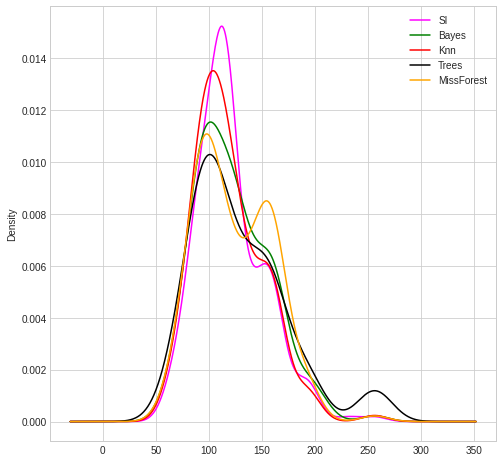

In [ ]:
#Iterative Imputer with Bayes, KNN, DecisionTreeRegressor, ExtraTreesRegressor
#Set up test and training sets
X_train, X_test, y_train, y_test = train_test_split(df_II.drop('City_MPG', axis=1), df_II['City_MPG'], test_size=0.3, random_state=0)

imputer_bayes = IterativeImputer(estimator=BayesianRidge(),max_iter=10,random_state=0)
imputer_knn = IterativeImputer(estimator=KNeighborsRegressor(n_neighbors=5), max_iter=10, random_state=0)
imputer_nonLin = IterativeImputer(estimator=DecisionTreeRegressor(max_features='sqrt', random_state=0), max_iter=10, random_state=0)
imputer_missForest = IterativeImputer( estimator=ExtraTreesRegressor(n_estimators=10, random_state=0), max_iter=10, random_state=0)

imputer_bayes.fit(X_train)
imputer_knn.fit(X_train)
imputer_nonLin.fit(X_train)
imputer_missForest.fit(X_train)

X_train_bayes = imputer_bayes.transform(X_train)
X_train_knn = imputer_knn.transform(X_train)
X_train_nonLin = imputer_nonLin.transform(X_train)
X_train_missForest = imputer_missForest.transform(X_train)

predictors = [var for var in variables if var !='City_MPG']
X_train_bayes = pd.DataFrame(X_train_bayes, columns = predictors)
X_train_knn = pd.DataFrame(X_train_knn, columns = predictors)
X_train_nonLin = pd.DataFrame(X_train_nonLin, columns = predictors)
X_train_missForest = pd.DataFrame(X_train_missForest, columns = predictors)

fig = plt.figure()
ax = fig.add_subplot(111)

df_SI['Normalized_Losses'].plot(kind='kde', ax=ax, color='magenta')
X_train_bayes['Normalized_Losses'].plot(kind='kde', ax=ax, color='green')
X_train_knn['Normalized_Losses'].plot(kind='kde', ax=ax, color='red')
X_train_nonLin['Normalized_Losses'].plot(kind='kde', ax=ax, color='black')
X_train_missForest['Normalized_Losses'].plot(kind='kde', ax=ax, color='orange')

# add legends
lines, labels = ax.get_legend_handles_labels()
labels = ['SI','Bayes', 'Knn', 'Trees', 'MissForest']
ax.legend(lines, labels, loc='best')
fig.set_size_inches(8,8)
plt.show()


###Note###
From the above, we would continue to execute various measures and statistics to determine which approach best fits our data. Here, given the above chart, we might choose the Bayes iterative imputer as it seems to manage and limit the distortion on both ends. It is not too wide or too shallow. As such, our further analysis will be focused using this data. 

In [ ]:
#Set Bayes to be our choice
df_B1 = X_train_bayes
df_B2 =  X_train_bayes
df_B2['City_MPG'] = df_LE['City_MPG']
df_B2.head()

,Symboling,Normalized_Losses,Make,Body_Style,Drive_Wheels,Wheel_Base,Length,Width,Height,Curb_Weight,...,Price,diesel,gas,std,turbo,four,two,front,rear,City_MPG
0,0.0,85.0,5.0,3.0,1.0,96.5,175.4,62.5,54.1,2372.0,...,10295.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,21
1,0.0,115.0,8.0,3.0,1.0,98.8,177.8,66.5,55.5,2410.0,...,8495.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,21
2,3.0,150.0,8.0,2.0,2.0,95.3,169.0,65.7,49.6,2380.0,...,11845.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,19
3,0.0,128.0,12.0,3.0,1.0,100.4,181.7,66.5,55.1,3095.0,...,13499.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,24
4,1.0,125.0,11.0,3.0,1.0,96.3,172.4,65.4,51.6,2405.0,...,8189.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,18


In [ ]:
#Correlation Matrix
corrMatrix = df_B2.corr()
corrMatrix

,Symboling,Normalized_Losses,Make,Body_Style,Drive_Wheels,Wheel_Base,Length,Width,Height,Curb_Weight,...,Price,diesel,gas,std,turbo,four,two,front,rear,City_MPG
Symboling,1.000000,0.556163,-0.175171,-0.610109,-0.034550,-0.574445,-0.405901,-0.301538,-0.592004,-0.253986,...,-0.063348,-0.192399,0.192399,0.065218,-0.065218,-0.688620,0.687594,-0.267908,0.267908,0.041046
Normalized_Losses,0.556163,1.000000,-0.344329,-0.360408,0.332983,-0.110634,-0.008988,0.008191,-0.429044,0.091608,...,0.116008,-0.141881,0.141881,-0.039678,0.039678,-0.405529,0.396241,0.012537,-0.012537,0.063887
Make,-0.175171,-0.344329,1.000000,0.124333,-0.023445,0.113724,0.118789,0.035234,0.251615,0.013667,...,-0.136298,0.183469,-0.183469,-0.054059,0.054059,0.175019,-0.156834,-0.067585,0.067585,0.059359
Body_Style,-0.610109,-0.360408,0.124333,1.000000,-0.131766,0.445109,0.350081,0.159786,0.617428,0.140756,...,-0.104158,0.154273,-0.154273,-0.073873,0.073873,0.702085,-0.710439,0.325583,-0.325583,-0.026763
Drive_Wheels,-0.034550,0.332983,-0.023445,-0.131766,1.000000,0.468787,0.533845,0.494556,0.044874,0.592001,...,0.615712,0.155472,-0.155472,-0.148039,0.148039,-0.026916,0.036374,-0.172123,0.172123,0.038636
Wheel_Base,-0.574445,-0.110634,0.113724,0.445109,0.468787,1.000000,0.877786,0.824589,0.615733,0.765338,...,0.536890,0.369373,-0.369373,-0.298482,0.298482,0.504708,-0.494162,0.222934,-0.222934,0.066156
Length,-0.405901,-0.008988,0.118789,0.350081,0.533845,0.877786,1.000000,0.858950,0.508630,0.874730,...,0.669144,0.279788,-0.279788,-0.243950,0.243950,0.478684,-0.459672,0.068316,-0.068316,0.091873
Width,-0.301538,0.008191,0.035234,0.159786,0.494556,0.824589,0.858950,1.000000,0.325000,0.866753,...,0.735534,0.338223,-0.338223,-0.364495,0.364495,0.280849,-0.267222,0.062808,-0.062808,0.053517
Height,-0.592004,-0.429044,0.251615,0.617428,0.044874,0.615733,0.508630,0.325000,1.000000,0.318882,...,0.099970,0.320886,-0.320886,-0.083283,0.083283,0.596299,-0.579884,0.129052,-0.129052,0.098614
Curb_Weight,-0.253986,0.091608,0.013667,0.140756,0.592001,0.765338,0.874730,0.866753,0.318882,1.000000,...,0.827947,0.286460,-0.286460,-0.356212,0.356212,0.242281,-0.232520,-0.053466,0.053466,0.033785


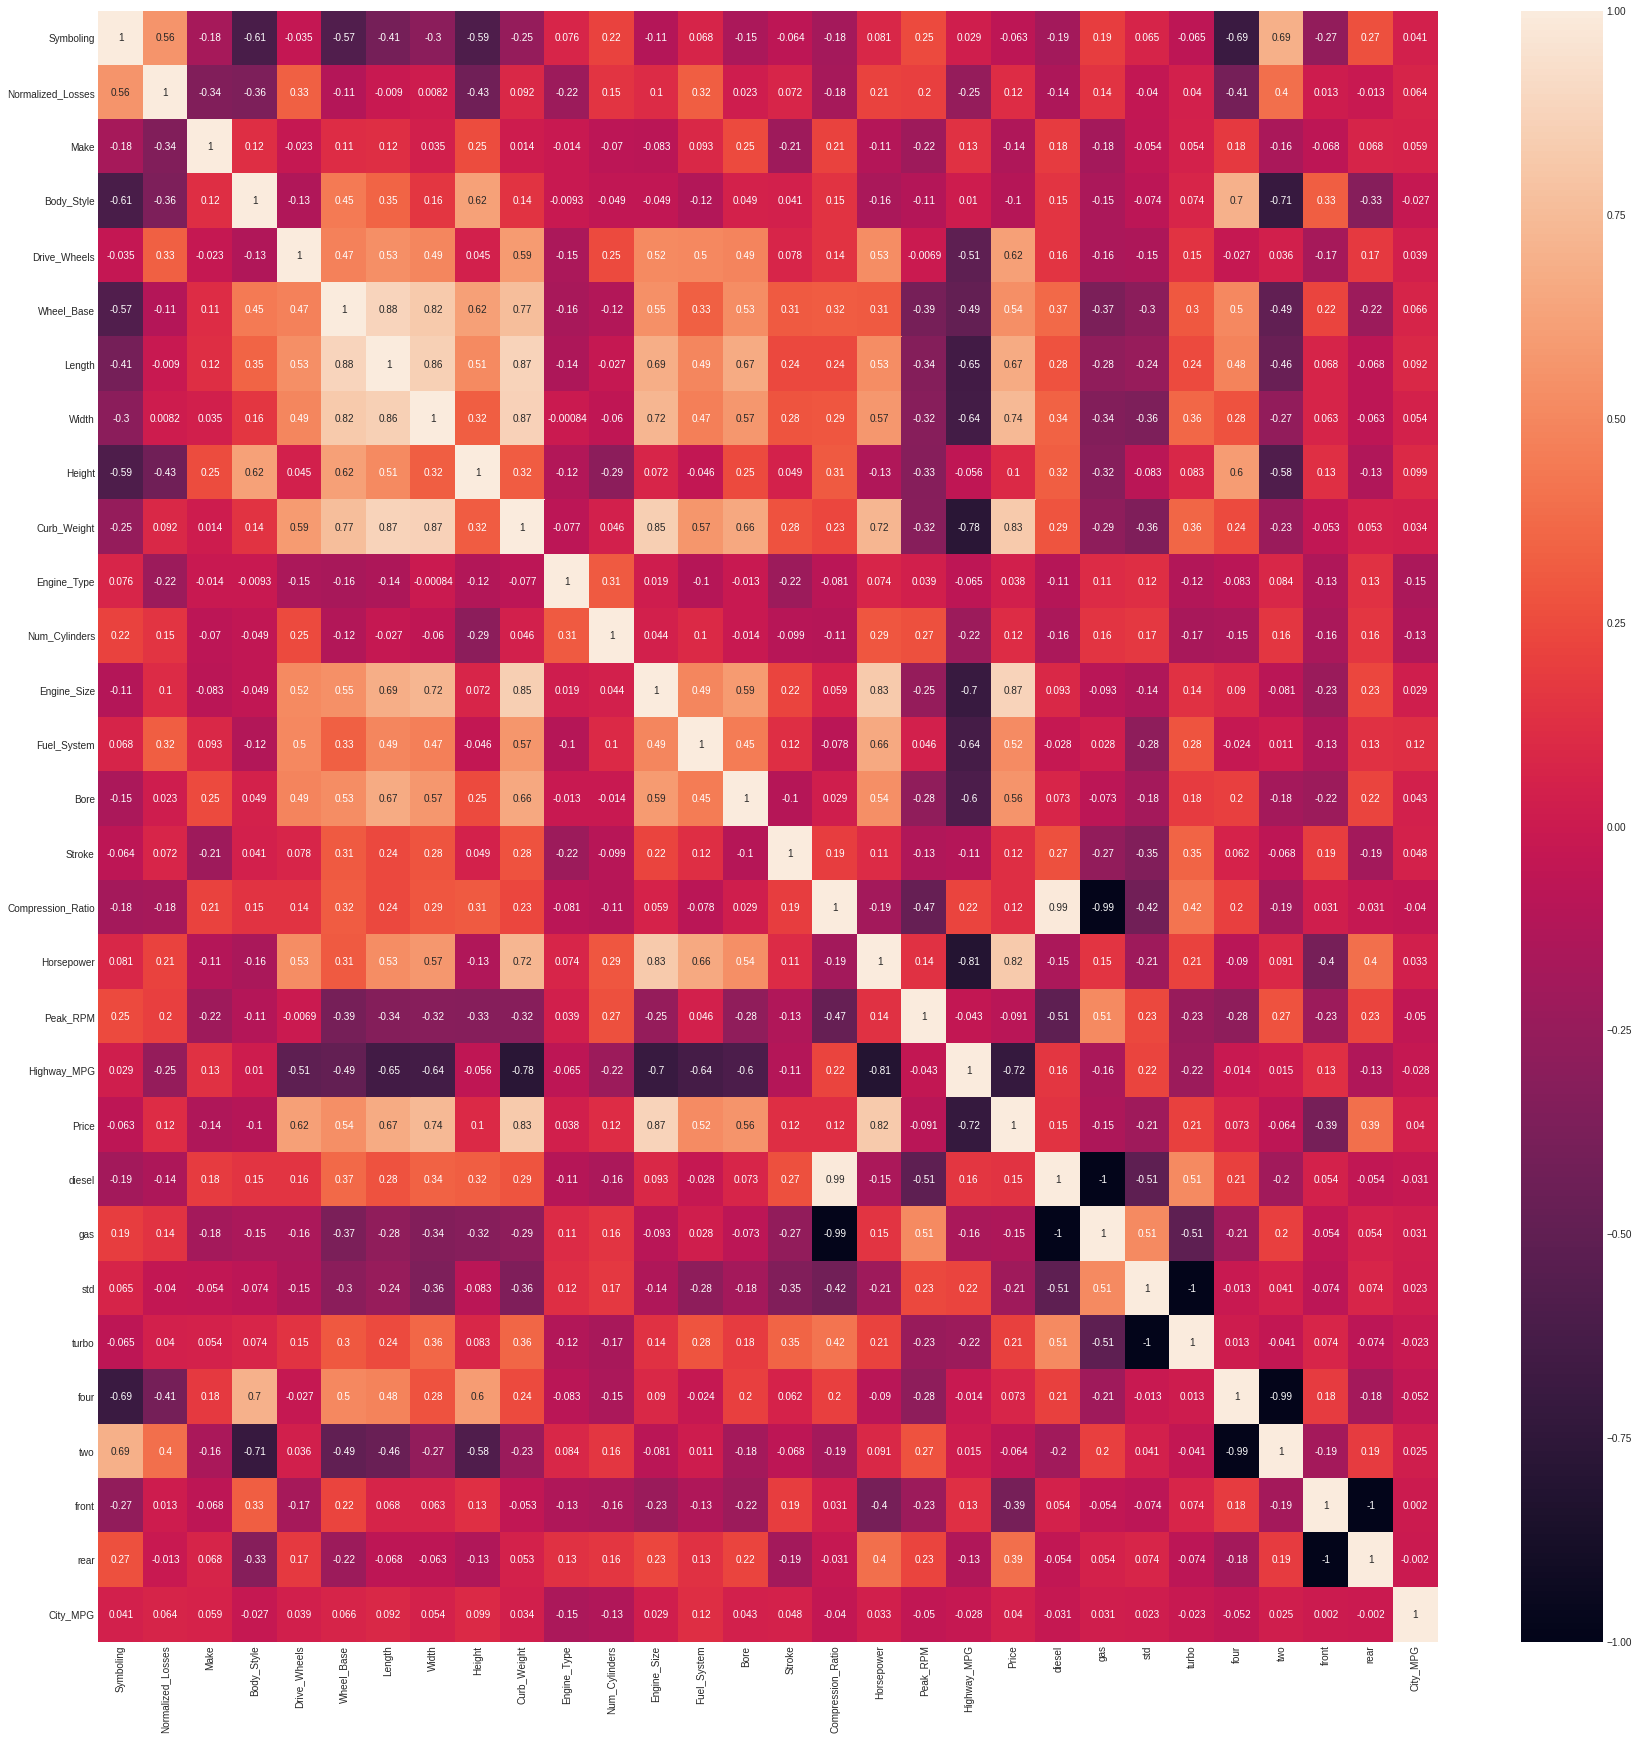

In [ ]:
# show visual representation of the correlation matrix
plt.rcParams.update({'font.size': 10,'figure.figsize':(30,30)})
f3 = sns.heatmap(corrMatrix, annot=True)
plt.show() # show plot

##**Histrogram**##

Our histogram shows us the make up of the data. The distributions look like a pareto distribution, outside of the discrete variables of course.  This is somewhat reasonable given description of the data.

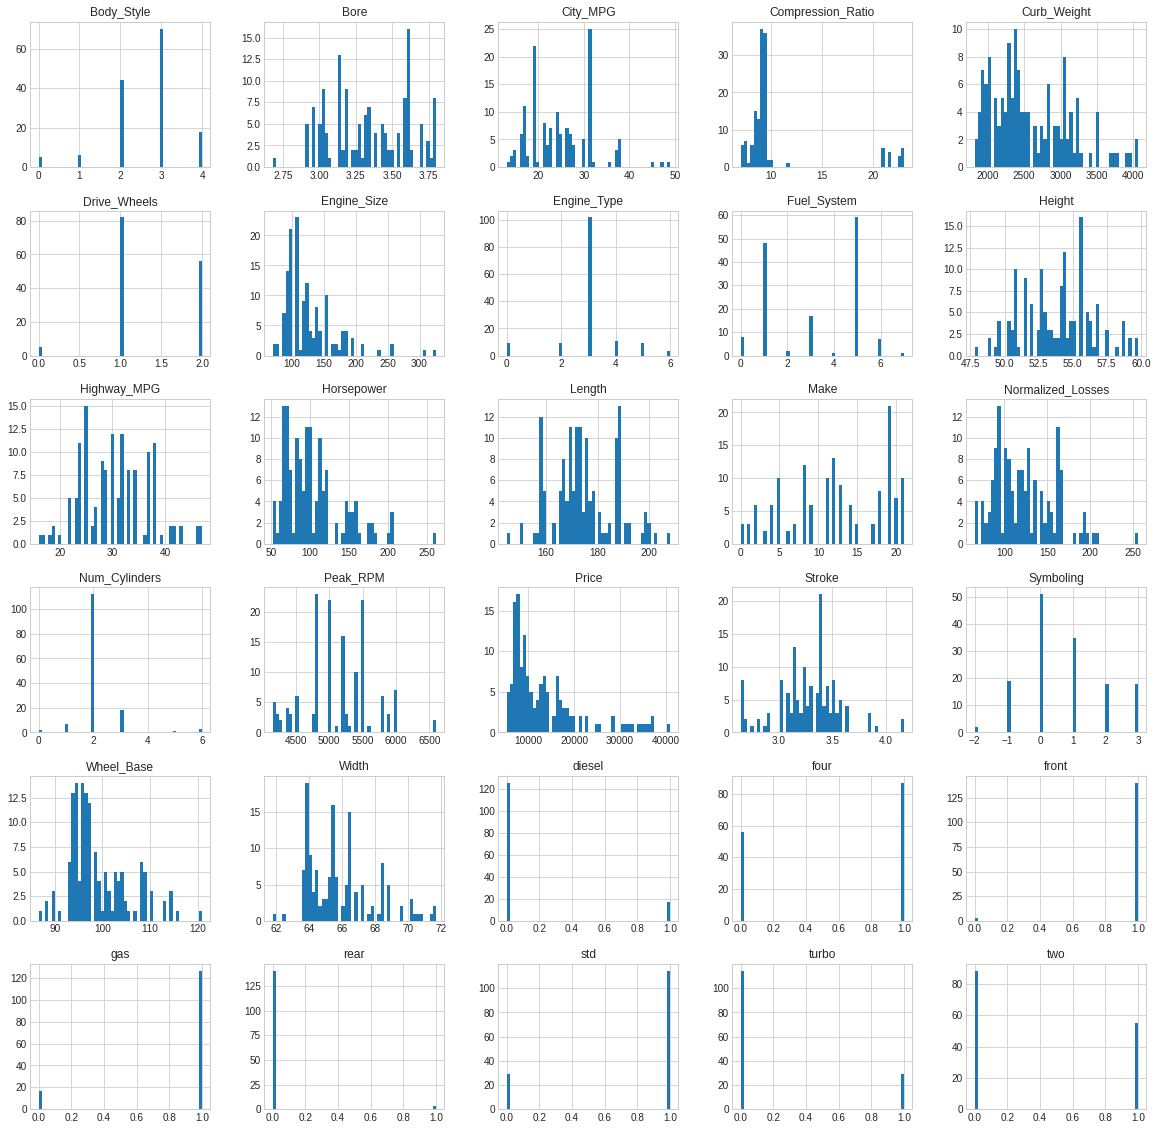

In [ ]:
#histograms
df_B2.hist(bins=50, figsize=(20,20))
plt.show()

##**Checking Variation**##

We check the variation to see if we should knock out any data due to it having an extremely low standard deviation.  Since deisel and gas are very small, we may decide to take them out. Not surprisingly, there is an analysis later on which for an entirely different reason will suggest the same thing. We will note it here, but for pedagogical purposes, we will delete it after the later analysis is finished.
We also note front and rear are very small on a comparative basis. As such, we will continue to investigate this and consider dropping it if other analysis corroborates this.

In [ ]:
df_B2.std()

Symboling               1.253853
Normalized_Losses      34.676238
Make                    6.247103
Body_Style              0.885552
Drive_Wheels            0.549079
Wheel_Base              6.258976
Length                 12.052101
Width                   2.064090
Height                  2.525753
Curb_Weight           528.853951
Engine_Type             1.074585
Num_Cylinders           0.781004
Engine_Size            42.208568
Fuel_System             2.018603
Bore                    0.265945
Stroke                  0.287835
Compression_Ratio       4.324095
Horsepower             38.091067
Peak_RPM              509.421962
Highway_MPG             6.387292
Price                7936.962219
diesel                  0.324786
gas                     0.324786
std                     0.403496
turbo                   0.403496
four                    0.489826
two                     0.488214
front                   0.143818
rear                    0.143818
City_MPG                7.013024
dtype: flo

##**Boxplot**##
Our boxplot shows that we really need to standardize or normalize or data in order to have charts that we can interpret better. As such, I will do so below.

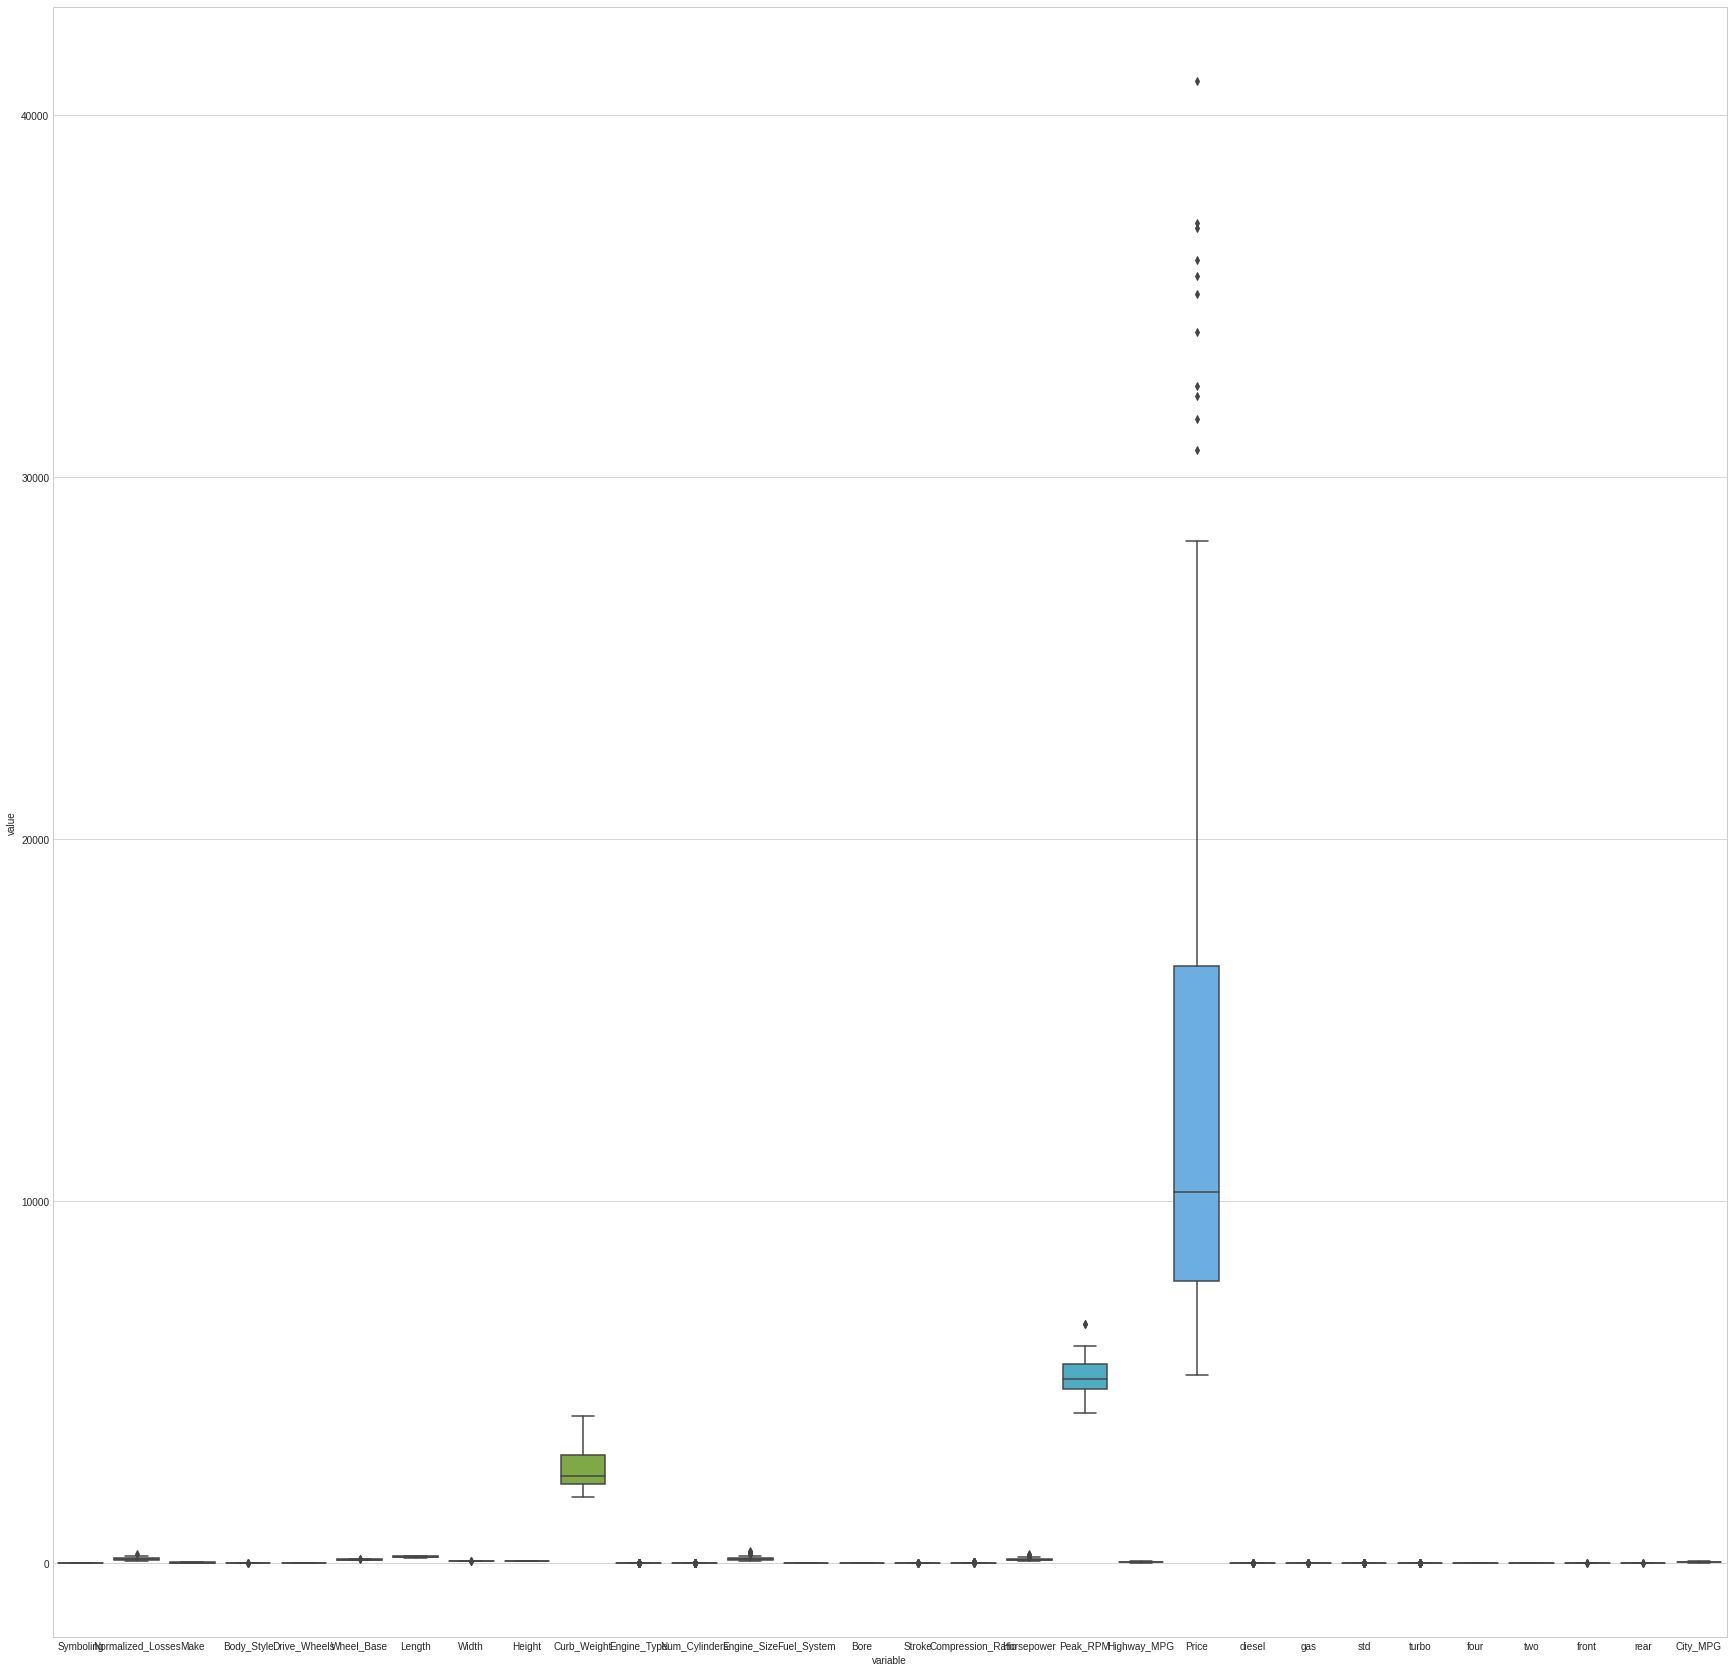

In [ ]:
#Check out our boxplot
sns.boxplot(x="variable", y="value", data=pd.melt(df_B2))

plt.show()


In [ ]:
#Normalized data
n_df_B2=(df_B2-df_B2.mean())/df_B2.std()
n_df_B2.head()

,Symboling,Normalized_Losses,Make,Body_Style,Drive_Wheels,Wheel_Base,Length,Width,Height,Curb_Weight,...,Price,diesel,gas,std,turbo,four,two,front,rear,City_MPG
0,-0.568876,-1.080085,-1.140669,0.418529,-0.649531,-0.399203,0.074270,-1.638745,0.111301,-0.389865,...,-0.380198,-0.366029,0.366029,0.5026,-0.5026,0.799485,-0.787800,0.145872,-0.145872,-0.536464
1,-0.568876,-0.214940,-0.660446,0.418529,-0.649531,-0.031731,0.273405,0.299155,0.665591,-0.318012,...,-0.606985,-0.366029,0.366029,0.5026,-0.5026,0.799485,-0.787800,0.145872,-0.145872,-0.536464
2,1.823750,0.794397,-0.660446,-0.710710,1.171702,-0.590928,-0.456758,-0.088425,-1.670346,-0.374738,...,-0.184909,-0.366029,0.366029,0.5026,-0.5026,-1.242058,1.260481,0.145872,-0.145872,-0.821648
3,-0.568876,0.159957,-0.020149,0.418529,-0.649531,0.223902,0.597000,0.299155,0.507222,0.977242,...,0.023483,-0.366029,0.366029,0.5026,-0.5026,0.799485,-0.787800,0.145872,-0.145872,-0.108689
4,0.228666,0.073442,-0.180223,0.418529,-0.649531,-0.431157,-0.174650,-0.233768,-0.878503,-0.327466,...,-0.645539,-0.366029,0.366029,0.5026,-0.5026,0.799485,-0.787800,0.145872,-0.145872,-0.964240


##**Boxplot of Standardized Data**##

We note that now our data is more reflective of what we would expect.  We could use this to now take out data that has too little variation that it would be useless, and we can also knock out the data points that are too far from the mean.  We don't see any data that has such low variation it would be useless, except of course the dummy variables, which we should not be judging with the same standard. 

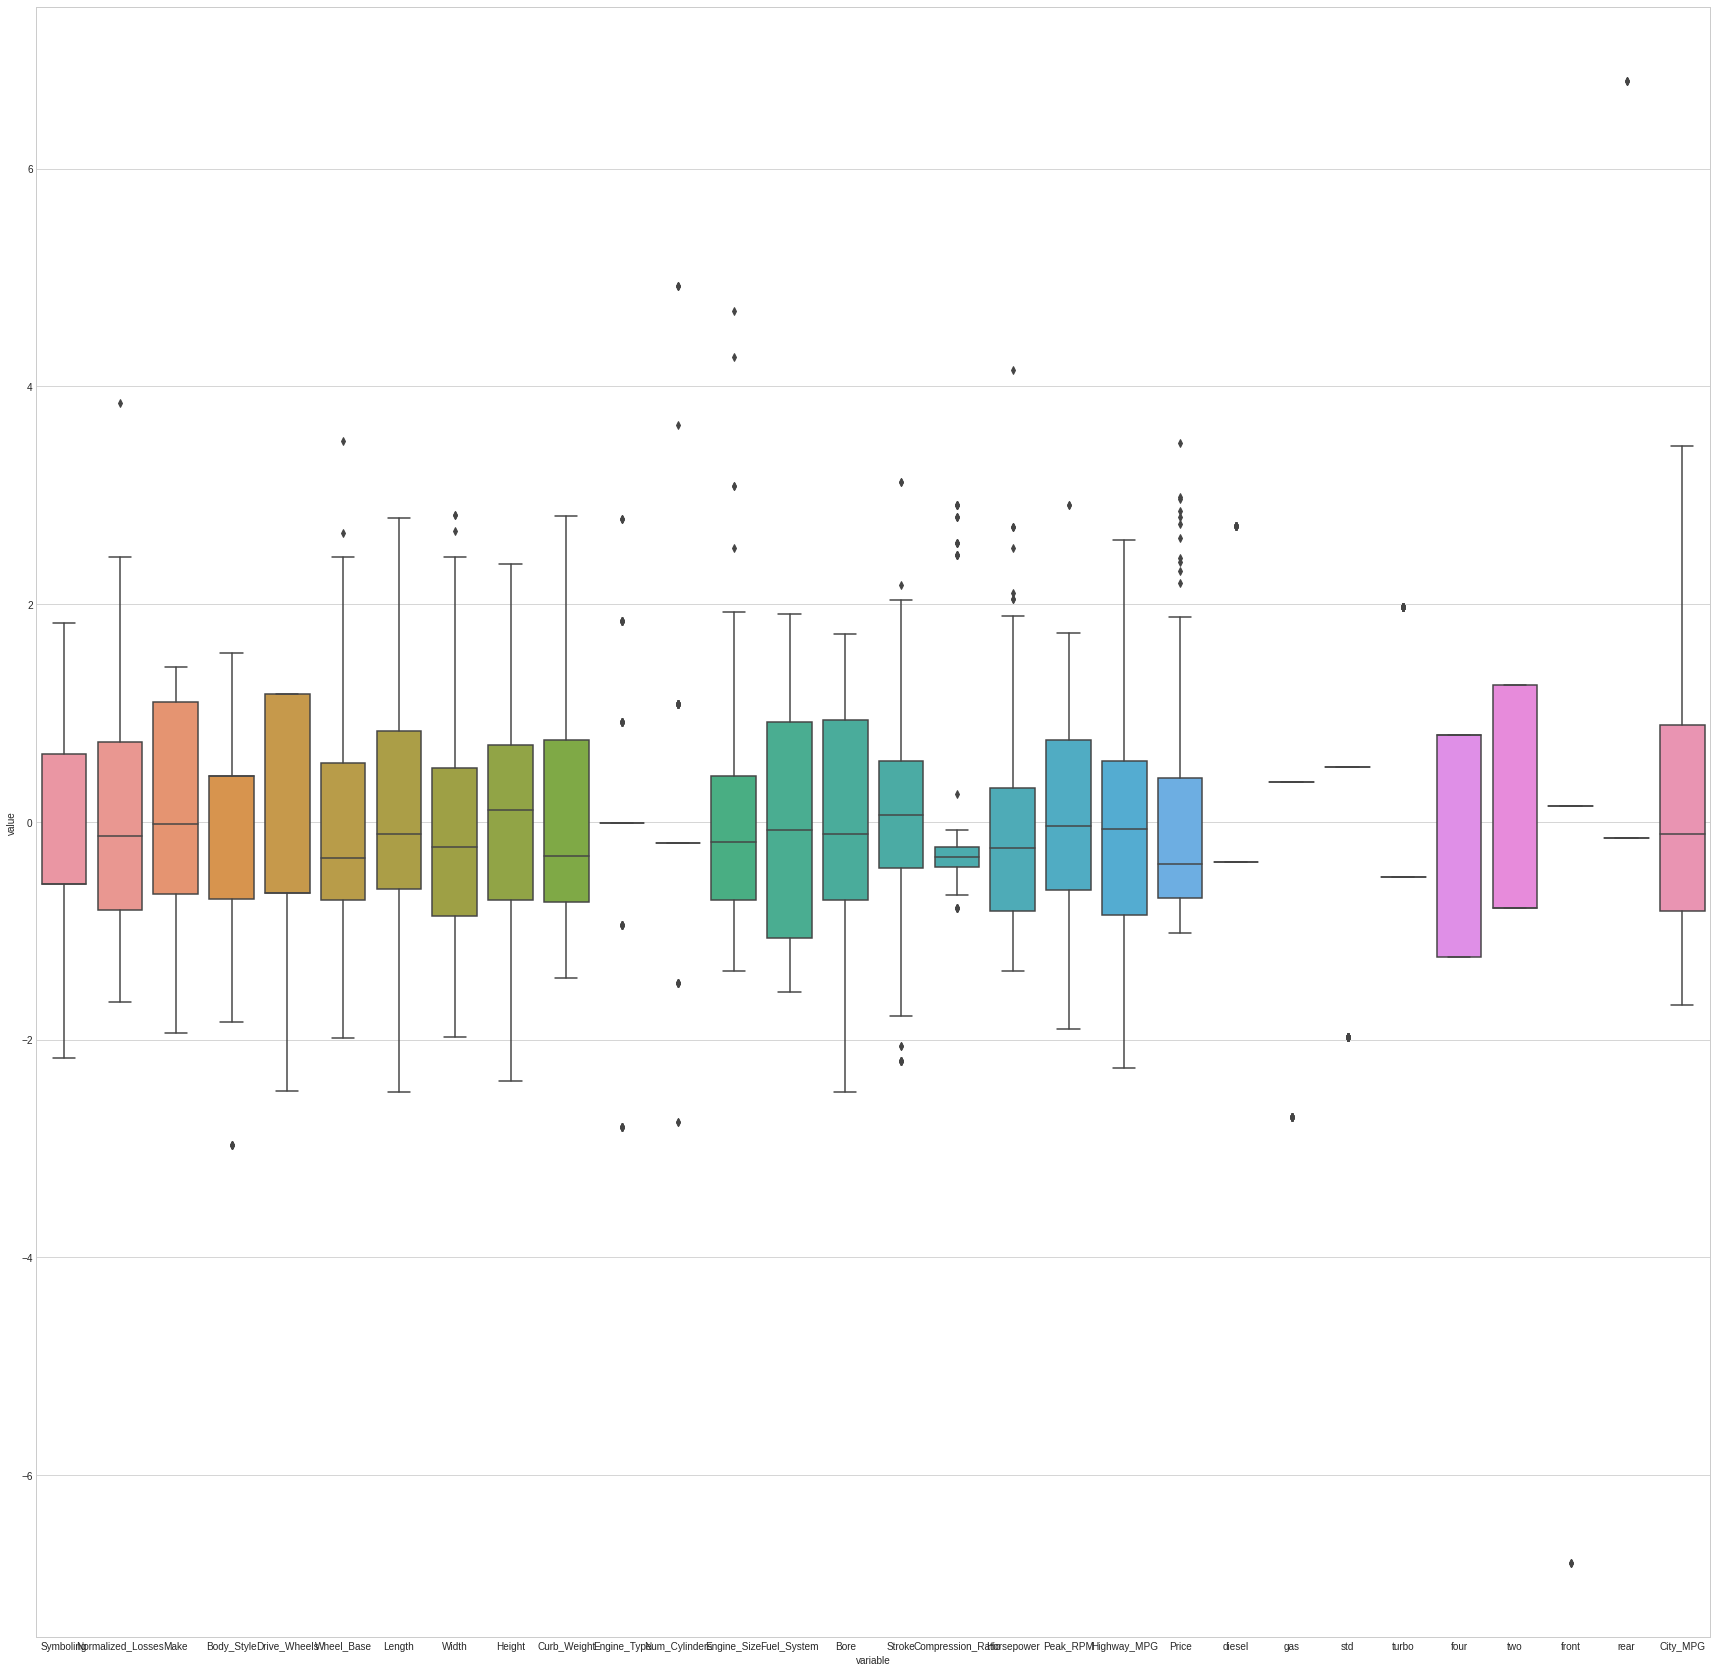

In [ ]:
#Check out our boxplot
sns.boxplot(x="variable", y="value", data=pd.melt(n_df_B2))
plt.show()

##**Statistics**##

Now that we have cleaned our data, imputed it, and standardized it. Let's test some of the basic statistics to make sure it makes sense. We will also do some charts again to ensure that we have data that makes sense.

In [ ]:
n_df_B2.describe().T

,count,mean,std,min,25%,50%,75%,max
Symboling,143.0,-6.055762e-17,1.0,-2.163960,-0.568876,-0.568876,0.627437,1.823750
Normalized_Losses,143.0,8.672162e-16,1.0,-1.656849,-0.806123,-0.128425,0.736721,3.851245
Make,143.0,-1.537232e-16,1.0,-1.941040,-0.660446,-0.020149,1.100370,1.420519
Body_Style,143.0,1.086932e-16,1.0,-2.969189,-0.710710,0.418529,0.418529,1.547769
Drive_Wheels,143.0,-3.105519e-17,1.0,-2.470764,-0.649531,-0.649531,1.171702,1.171702
Wheel_Base,143.0,7.496917e-16,1.0,-1.980931,-0.718744,-0.335295,0.543443,3.499198
Length,143.0,2.916665e-15,1.0,-2.481301,-0.618556,-0.108271,0.837622,2.787489
Width,143.0,5.884764e-15,1.0,-1.977878,-0.863585,-0.233768,0.492945,2.818425
Height,143.0,-1.842504e-14,1.0,-2.383004,-0.720134,0.111301,0.705183,2.368053
Curb_Weight,143.0,3.330669e-16,1.0,-1.435523,-0.733060,-0.310448,0.751281,2.813287


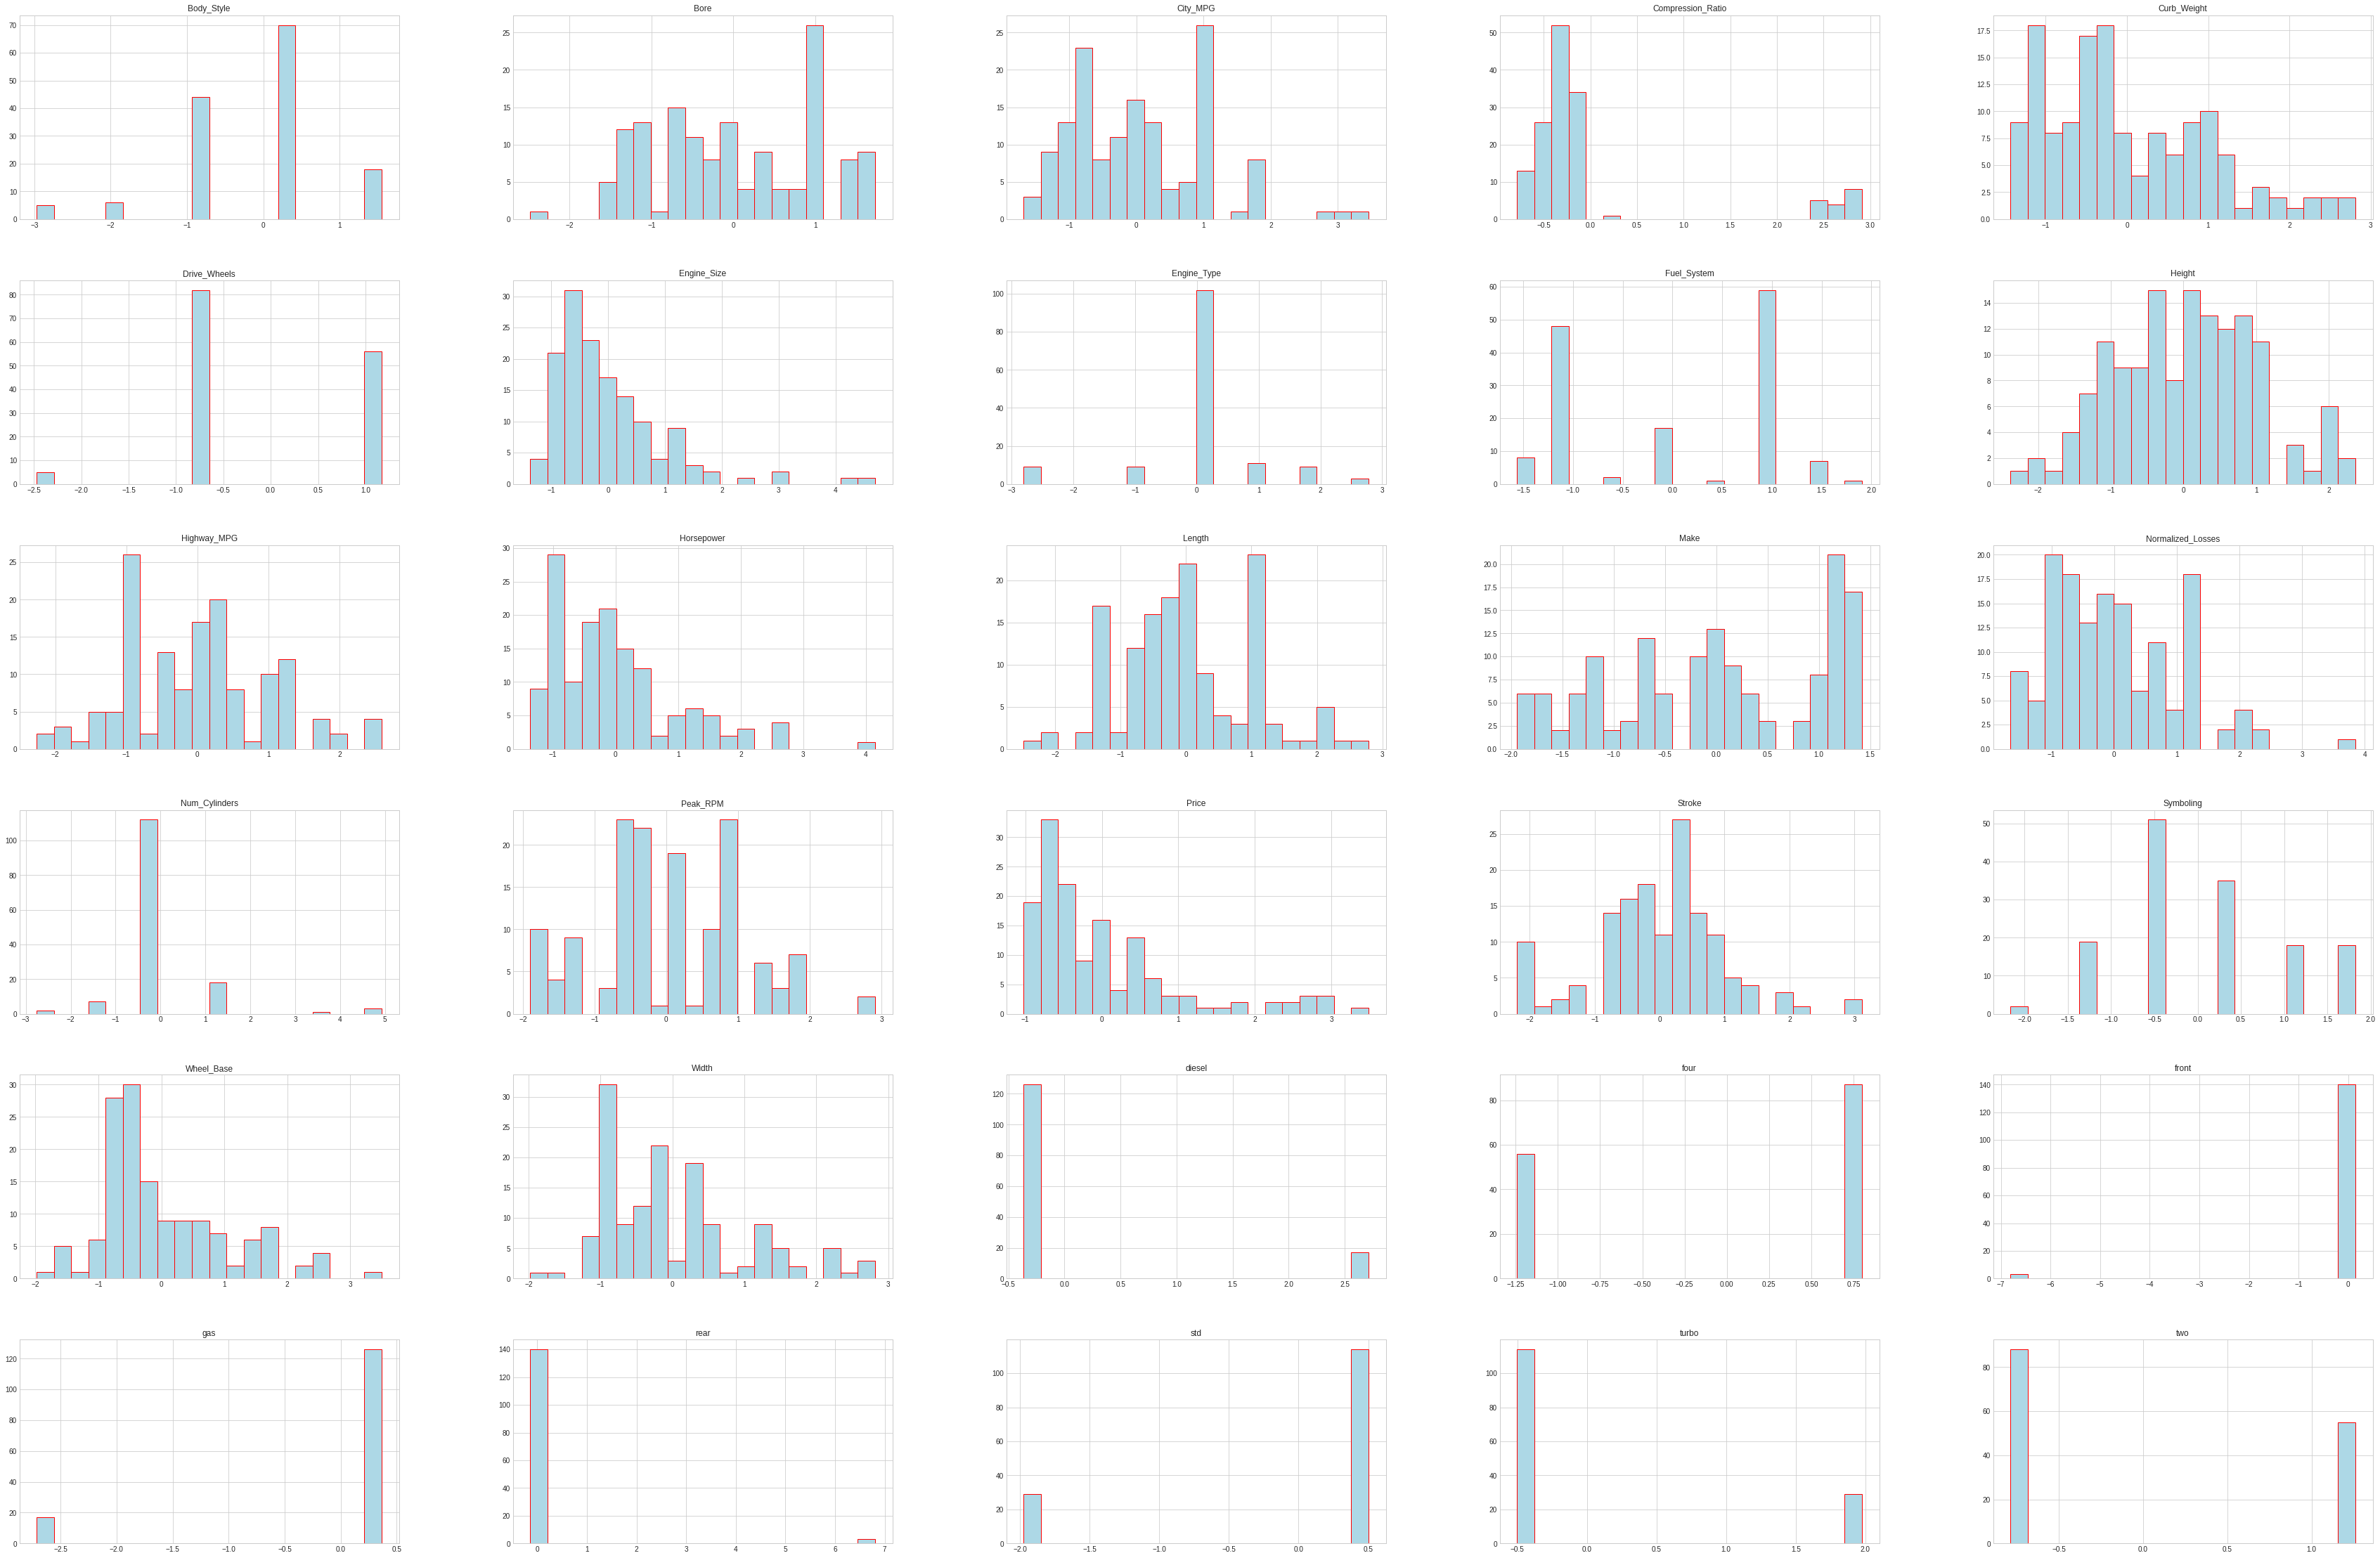

In [ ]:
plt.style.use('seaborn-whitegrid')
n_df_B2.hist(bins=20, figsize=(60,40), color='lightblue', edgecolor = 'red')
plt.show()

##**Multicollinearity**##

Since our objective is to recognize te city_mpg based on some input features, we check our main assumption that there is little or no multicollinearity between the features. If our dataset has perfectly positive or negative attributes as can be obseverd from our correlation analysis, there is a high chance that the performance of the model will be impacted by a problem called — “Multicollinearity”. Multicollinearity happens when one predictor variable in a multiple regression model can be linearly predicted from the others with a high degree of accuracy. This can lead to skewed or misleading results.

If two features are highly correlated then there is no point using both features, hence we can drop one feature. SNS heatmapping gives us the correlation matrix where we can see this.

From above correlation matrix we can see that there are several features which are highly correlated. Through our distinct and insightful analysis we have found sevearl features which are duplicates and will therefore be cut out of the data. If there is a feature with correlation greater than .85 or less than -.85 we will choose only one of those and drop the other. 

*  Curb_Weight is .87 correlation to length and width, we will therefore only keep Curb_Weight
*  Gas and diesel are perfectly negatively correlated with a -1, so we will drop diesel
*  Wheel_base and length are also perfectly correlated, but we are already dropping length, so we should be OK
*  Price and engine_size are highly correlated, as such, we will drop engine size

All other potential issues will be corrected with the above choices. As such, we have begin cleaning up the model and removing some of the features that need to be cleaned.

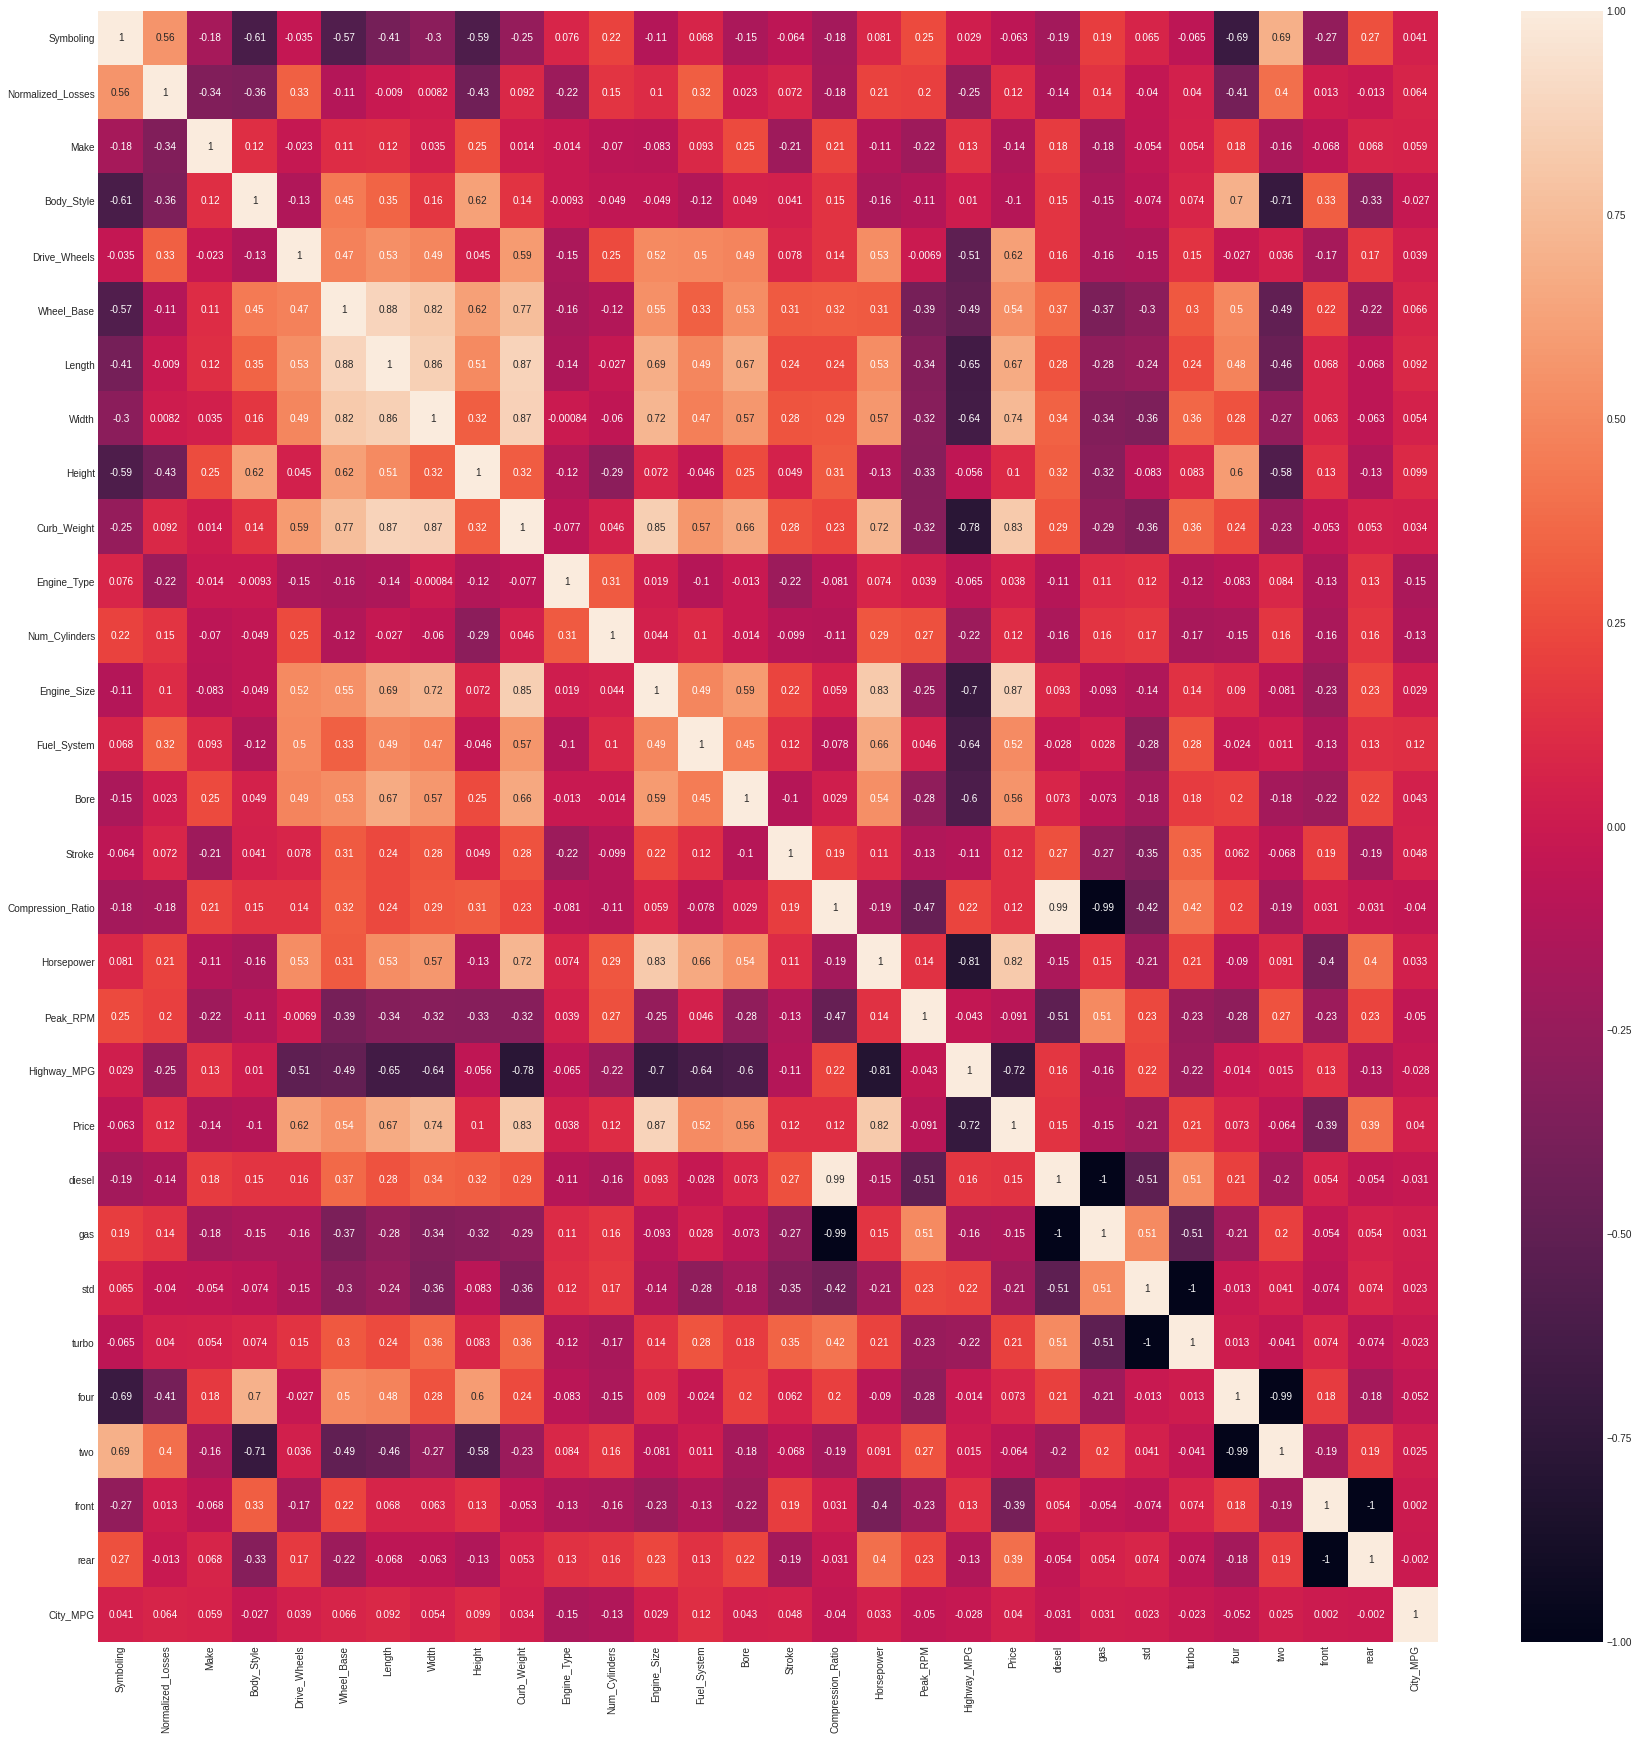

In [ ]:
#Correlation Matrix
corrMatrix = n_df_B2.corr()

# show visual representation of the correlation matrix
plt.rcParams.update({'font.size': 10,'figure.figsize':(30,30)})
f3 = sns.heatmap(corrMatrix, annot=True)
plt.show() # show plot

In [ ]:
n_df_B2 = n_df_B2.drop(['Length','Width','Engine_Size','diesel'], axis =1)
n_df_B2.head()

,Symboling,Normalized_Losses,Make,Body_Style,Drive_Wheels,Wheel_Base,Height,Curb_Weight,Engine_Type,Num_Cylinders,...,Highway_MPG,Price,gas,std,turbo,four,two,front,rear,City_MPG
0,-0.568876,-1.080085,-1.140669,0.418529,-0.649531,-0.399203,0.111301,-0.389865,-0.013015,-0.196985,...,0.400708,-0.380198,0.366029,0.5026,-0.5026,0.799485,-0.787800,0.145872,-0.145872,-0.536464
1,-0.568876,-0.214940,-0.660446,0.418529,-0.649531,-0.031731,0.665591,-0.318012,-0.013015,-0.196985,...,0.244147,-0.606985,0.366029,0.5026,-0.5026,0.799485,-0.787800,0.145872,-0.145872,-0.536464
2,1.823750,0.794397,-0.660446,-0.710710,1.171702,-0.590928,-1.670346,-0.374738,2.778761,4.924627,...,-1.164900,-0.184909,0.366029,0.5026,-0.5026,-1.242058,1.260481,0.145872,-0.145872,-0.821648
3,-0.568876,0.159957,-0.020149,0.418529,-0.649531,0.223902,0.507222,0.977242,1.848169,1.083418,...,-1.321461,0.023483,0.366029,0.5026,-0.5026,0.799485,-0.787800,0.145872,-0.145872,-0.108689
4,0.228666,0.073442,-0.180223,0.418529,-0.649531,-0.431157,-0.878503,-0.327466,-0.013015,-0.196985,...,0.244147,-0.645539,0.366029,0.5026,-0.5026,0.799485,-0.787800,0.145872,-0.145872,-0.964240


#**Regression Test**#

Now that we have fully prepared our data, we test the regression model below.  This is a standard training model. We test the regression model on the data that has yet to be reduced in dimension, currently it has 26 features. We will record the statistic to measure against the output of PCA to see if it is a viable approach.

In [ ]:
'''midStep = n_df_B2.copy()
S = midStep.drop(['City_MPG'], axis = 1)
t = n_df_B2['City_MPG']

S_train, S_test, t_train, t_test = model_selection.train_test_split(S,t,test_size=0.3,random_state=42)

sS = preprocessing.StandardScaler().fit_transform(S)
sS_train, sS_test, st_train, st_test = model_selection.train_test_split(sX,t,test_size=0.3,random_state=42)

dummy = DummyRegressor()
dummy.fit(S_train, t_train)
prePCAscore = dummy.score(S_test, t_test)
print(prePCAscore)
'''

"midStep = n_df_B2.copy()\nS = midStep.drop(['City_MPG'], axis = 1)\nt = n_df_B2['City_MPG']\n\nS_train, S_test, t_train, t_test = model_selection.train_test_split(S,t,test_size=0.3,random_state=42)\n\nsS = preprocessing.StandardScaler().fit_transform(S)\nsS_train, sS_test, st_train, st_test = model_selection.train_test_split(sX,t,test_size=0.3,random_state=42)\n\ndummy = DummyRegressor()\ndummy.fit(S_train, t_train)\nprePCAscore = dummy.score(S_test, t_test)\nprint(prePCAscore)\n"

#**PCA**#

Now that we have cleaned the data, imputed, and checked for all that we can "eye-ball" we will run PCA to get a dimensional reduction.

PCA is a dimension redcuction methodology which aims to reduce a large set of (often correlated) variables into a smaller set of (uncorrelated) variables, called principal components, which holds sufficient information without loosing the the relevant info much.

Principal components are new variables that are constructed as linear combinations or mixtures of the initial variables. These combinations are done in such a way that the new variables (i.e., principal components) are uncorrelated and most of the information within the initial variables is squeezed or compressed into the first components.

It generally follows the following steps, some of which we have already performed:
* Split our data into training and test data set
* Normalize the training set using standard scalar
* Calculate the covariance matrix
* Calculate the eigenvectors and their eigenvalues
* Sort the eigenvectors according to their eigenvalues in descending order
* Choose the first K eigenvectors (where k is the dimension we'd like to end up with)
* Build new dataset with reduced dimensionality

Below we use PCA to test all our data and see which number of components to choose by using the scree plot as outlined below.  We use a StandardScaler and fit the data in a vanilla way, however we do see that both the scree plot and the cumulative variance plot clearly indicate that 10 components gives us about 90% of the necessary information. If we up it to 13 components, we have about 95% of the information. We also note that our Contribution of Features to Components Map shows that our City_MPG is heavily influenced by components numbers 5 and 9.

In [ ]:
pca = PCA(random_state=42)
X_pca = pca.fit_transform(StandardScaler().fit_transform(n_df_B2))
#Amount of variance for each component normalized (sums to 1)
pca.explained_variance_ratio_


array([2.35496081e-01, 1.98309341e-01, 1.09161338e-01, 8.43962776e-02,
       5.46877741e-02, 4.72502866e-02, 4.56216917e-02, 3.71317392e-02,
       3.39772688e-02, 2.66749624e-02, 2.48376373e-02, 1.90539616e-02,
       1.78834206e-02, 1.47045860e-02, 1.13800172e-02, 9.38476821e-03,
       8.63456336e-03, 7.52568842e-03, 5.20347054e-03, 4.37174232e-03,
       1.99075443e-03, 1.68061041e-03, 4.78575560e-04, 1.63443525e-04,
       1.07063135e-33, 1.07063135e-33])

In [ ]:
#Principal components (columns of linear combination weights for original features)
pca.components_[0]

array([-0.21107755, -0.05247783,  0.06813599,  0.16321173,  0.21026655,
        0.35856312,  0.22909199,  0.35333197, -0.06077992, -0.04370503,
        0.19589601,  0.25971611,  0.12100505,  0.17241161,  0.19700001,
       -0.1780062 , -0.23424374,  0.26787758, -0.19873721, -0.20570986,
        0.20570986,  0.21669889, -0.21534007,  0.01615452, -0.01615452,
        0.0200148 ])

[(0.0, 1.0),
 Text(0, 0.5, 'Percent of Explained variance'),
 Text(0.5, 0, 'Component'),
 Text(0.5, 1.0, 'Scree Plot')]

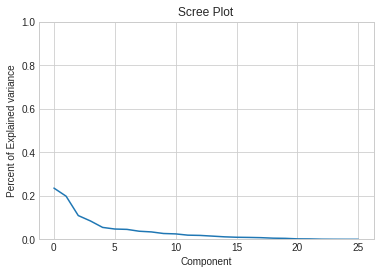

In [ ]:
#Scree plot
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(pca.explained_variance_ratio_)
ax.set( xlabel="Component", ylabel="Percent of Explained variance", title="Scree Plot", ylim=(0, 1))

[(0.0, 1.0),
 Text(0, 0.5, 'Percent of Explained variance'),
 Text(0.5, 0, 'Component'),
 Text(0.5, 1.0, 'Cumulative Variance')]

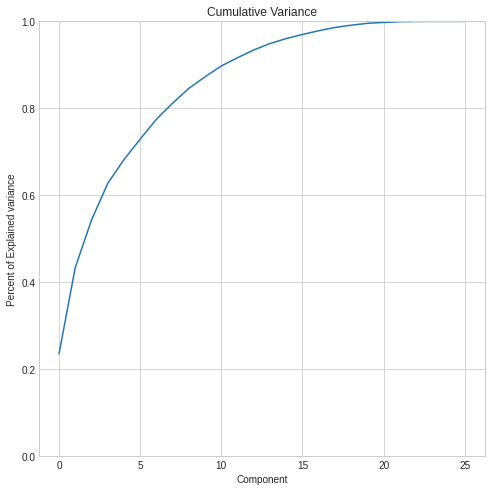

In [ ]:
#cumulative variance plot
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(np.cumsum(pca.explained_variance_ratio_))
ax.set( xlabel="Component", ylabel="Percent of Explained variance", title="Cumulative Variance", ylim=(0, 1))

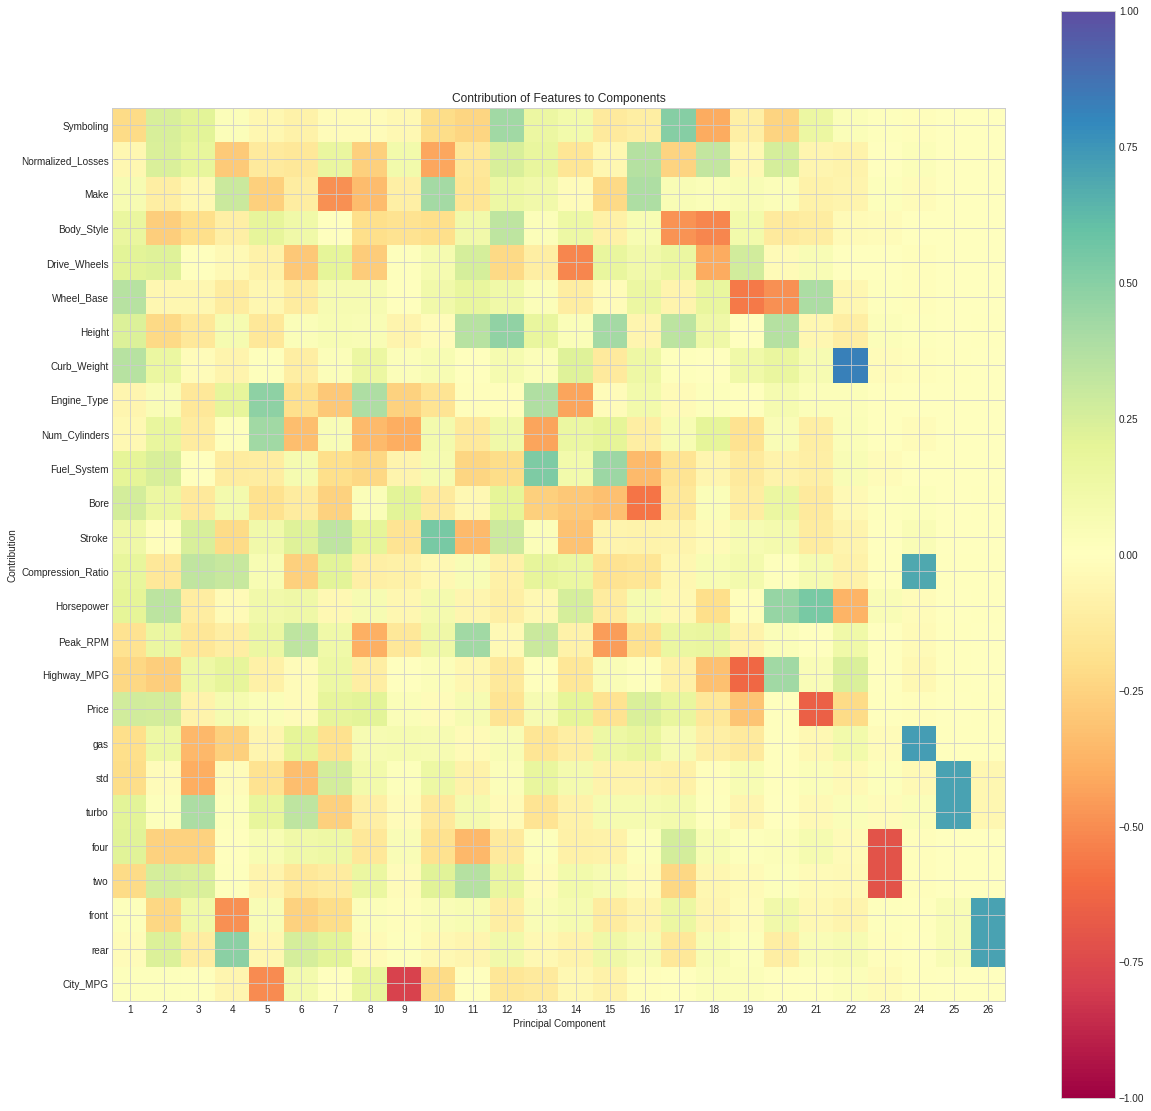

In [ ]:
#contribution of features to components plot
X = n_df_B2
fig, ax = plt.subplots(figsize=(20, 20))
plt.imshow(pca.components_.T, cmap="Spectral", vmin=-1, vmax=1)
plt.yticks(range(len(X.columns)), X.columns)
plt.xticks(range(26), range(1, 27))
plt.xlabel("Principal Component")
plt.ylabel("Contribution")
plt.title("Contribution of Features to Components")
plt.colorbar()

##**Using PCA**##

Now that we have decided that 13 components is a reasonable dimensionality reduction, we set the pca to that and test our model.

In [ ]:
#Normalized data
#We could have done it similar to this data_scaled = pd.DataFrame(preprocessing.scale(df),columns = df.columns), but we'll stick with what we did above
n_df_B1=(df_B1-df_B1.mean())/df_B1.std()

pca = PCA(n_components=13)
X = pca.fit_transform(n_df_B1)
X = pd.DataFrame(X)
y = n_df_B2['City_MPG']

X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=0.3,random_state=42)

sX = preprocessing.StandardScaler().fit_transform(X)
sX_train, sX_test, sy_train, sy_test = model_selection.train_test_split(sX,y,test_size=0.3,random_state=42)

dr = DummyRegressor()
dr.fit(X_train, y_train)
postPCAscore = dr.score(X_test, y_test)
print(prePCAscore, postPCAscore)


NameError: ignored

#**Summary**#

In summary, using PCA and the regular regression fit I got the same r-sqaure. There are only two possible explanations here, the most obvious of which is I did something wrong.

I spent a very long time trying to figure out at which step I am making a mistake, but, sadly, I am not sure. As such, my conclusion is that PCA is wonderful in the sense that I have less features and the data may be easier to understand, however, I can't help but beleive I did something wrong, otherwise my two results would not be exactly the same thing.

#Review of the Above Submission

1. It is not appropriate to apply PCA to categorical data, even if the categorical information has been converted to (or is presented in) numerical format. PCA is meant to be applied to continuous variables, for which it tries to maximize the variance (i.e, the squared deviations) of the data. The concept of squared deviations doesn't really exist when applied to binary or label encoded data. Categorical data is measured on a nominal scale meaning that the category spacing has no interval/ratio meaning. So while you can obtain an output from a PCA algorithm based on numeric encodings of categorical inputs, the output is highly unlikely to have any relevant "meaning". If you want to reduce the dimensionality of categorical data you should instead rely on the use of __feature selection techniques__.

2. We are likely obtaining identical results between your PCA and non-PCA models due to using the DummyRegressor() function to implement your models. As stated in the documentation for that function (see https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyRegressor.html) "This regressor is useful as a simple baseline to compare with other (real) regressors. Do not use it for real problems." Instead use an actual linear regression function, e.g., like those found in both the statsmodels and scikit-learn libraries. 